In [5]:
import matplotlib
import pandas as pd
from sklearn.preprocessing import StandardScaler
from common.clustering import perform_clustering_score_analysis, k_means_multiple_dim_silhouette, \
    hierarchical_multiple_dim_silhouette, plot_clustering_scores, hierarchical_multiple_dim_calinski_harabasz, \
    k_means_multiple_dim_calinski_harabasz
from common.outliers import find_outliers_in_multiple_columns, drop_outliers_from_dataset

matplotlib.rcParams['figure.figsize'] = [7, 7]

### Constants and settings

In [6]:
numbers_of_clusters = range(2, 20)
columns_used_for_clustering = ["User_Score", "Critic_Score", "EU_Sales", "NA_Sales", "JP_Sales", "Year_of_Release"]

### Load and prepare dataset
Please note that the `_preprocessed` file is required. To use this notebook
properly, please execute the preprocessing one first to generate proper dataset
file.

In [7]:
# load dataset from file, remove unused columns
data = pd.read_excel("../data/games_sales_2016_preprocessed.xlsx", index_col=0)
data = data.filter(items=columns_used_for_clustering)

# standardization
standardization = StandardScaler().fit(data[columns_used_for_clustering])
data[columns_used_for_clustering] = standardization.transform(data[columns_used_for_clustering])

# outliers detection
k_neighbours = 5
r_percentage = 0.03
outliers, non_outliers = find_outliers_in_multiple_columns(data, columns_used_for_clustering, k_neighbours, r_percentage)

# remove outliers
data = drop_outliers_from_dataset(data, outliers)

## Clustering - analysis
Used variables:
 - Critic_Score
 - User_Score
 - EU_Sales
 - NA_Sales
 - JP_Sales
 - Year_of_Release

### Silhouette score analysis
First, we perform clustering analysis using the **silhouette** coefficient, to get the optimal number of clusters.
This will take some time ...

Performing Silhouette score analysis ... 

Used method: K-Means
Score for 2 clusters 0.2747145242111155 (+-3.8264251534791644e-05)
Score for 3 clusters 0.24521124144762935 (+-2.7999874212557058e-05)
Score for 4 clusters 0.22167485541391344 (+-3.322999543418442e-05)
Score for 5 clusters 0.22981008691093582 (+-0.0001434751171175361)
Score for 6 clusters 0.23384963351432422 (+-6.91909808261539e-05)
Score for 7 clusters 0.22016260196335932 (+-0.0001956483687902179)
Score for 8 clusters 0.20974641916428788 (+-0.0009701739813539621)
Score for 9 clusters 0.21911475209593945 (+-0.0010117209732344173)
Score for 10 clusters 0.2122709241683516 (+-8.305639692831767e-05)
Score for 11 clusters 0.21059009011004975 (+-0.00011781466576557314)
Score for 12 clusters 0.20886918271721083 (+-0.0030747662779445346)
Score for 13 clusters 0.2051800542179831 (+-0.001001646138173826)
Score for 14 clusters 0.2025493039353067 (+-0.002661209489635555)
Score for 15 clusters 0.20231397793545303 (+-0.00335306620045870

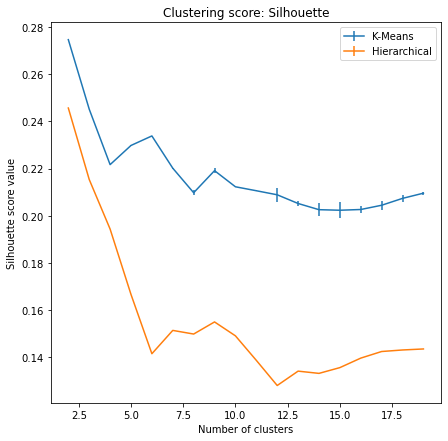

In [8]:
print("Performing Silhouette score analysis ... ")

print("\nUsed method: K-Means")
k_means_scores, k_means_errors = \
    perform_clustering_score_analysis(data, columns_used_for_clustering, numbers_of_clusters,
                                      k_means_multiple_dim_silhouette, 10)

print("\nUsed method: Hierarchical")
hierarchical_scores, hierarchical_errors = \
    perform_clustering_score_analysis(data, columns_used_for_clustering, numbers_of_clusters,
                                      hierarchical_multiple_dim_silhouette, 2)

scores = [k_means_scores, hierarchical_scores]
errors = [k_means_errors, hierarchical_errors]
methods = ["K-Means", "Hierarchical"]
plot_clustering_scores(numbers_of_clusters, scores, errors, methods, "Silhouette")

### Caliński-Harabasz score analysis
We also perform clustering analysis using different score calculating technique - **Calinski-Harabasz** score.
This will also take some time...

Performing Calinski-Harabasz score analysis ... 

Used method: K-Means
Score for 2 clusters 4408.14812165087 (+-0.0612183344632464)
Score for 3 clusters 4010.989272465955 (+-0.025170261986508177)
Score for 4 clusters 3553.456668138047 (+-0.06064805549906584)
Score for 5 clusters 3370.4744541788014 (+-0.01759471705894679)
Score for 6 clusters 3181.7652385777533 (+-0.0022122933764474146)
Score for 7 clusters 3027.2887129169467 (+-0.08933689014798349)
Score for 8 clusters 2905.0747402768548 (+-0.33211377583770396)
Score for 9 clusters 2827.773786869311 (+-0.20098970186674592)
Score for 10 clusters 2750.1208808617994 (+-0.02938173085048443)
Score for 11 clusters 2678.800997104084 (+-0.11776625354705789)
Score for 12 clusters 2582.8727210697352 (+-0.2804102160085669)
Score for 13 clusters 2495.3806118259367 (+-1.170474299567998)
Score for 14 clusters 2417.7563769016315 (+-3.1643988262605633)
Score for 15 clusters 2350.2460006406413 (+-2.352315590682813)
Score for 16 clusters 2296.9037393232

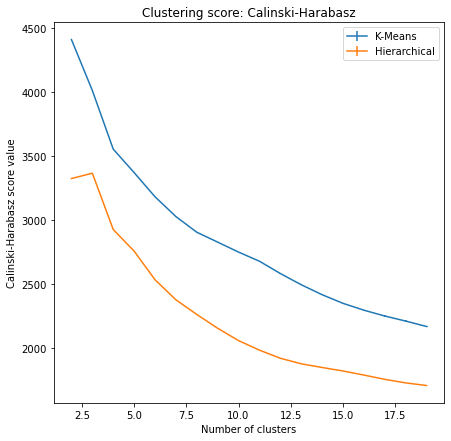

In [9]:
print("Performing Calinski-Harabasz score analysis ... ")

print("\nUsed method: K-Means")
k_means_scores, k_means_errors = \
    perform_clustering_score_analysis(data, columns_used_for_clustering, numbers_of_clusters,
                                      k_means_multiple_dim_calinski_harabasz, 10)

print("\nUsed method: Hierarchical")
hierarchical_scores, hierarchical_errors = \
    perform_clustering_score_analysis(data, columns_used_for_clustering, numbers_of_clusters,
                                      hierarchical_multiple_dim_calinski_harabasz, 2)

scores = [k_means_scores, hierarchical_scores]
errors = [k_means_errors, hierarchical_errors]
methods = ["K-Means", "Hierarchical"]
plot_clustering_scores(numbers_of_clusters, scores, errors, methods, "Calinski-Harabasz")
